<header style="background-color: rgb(0, 62, 92); color: white; margin-top: 20px; padding:28px; ">
  <img src="images/Xlogo.png" alt="Transposition of a vector" title="Vector transposition" width="115" style="float: left;">
  <p style=" text-align: center; font-size: 32px;">   
   <strong> Fractional and Volterra processes in Finance  </strong></p>
  <p style=" text-align: center; font-size: 25px;"><strong> Challenge 2 -  Pricing by Fourier </strong></p>
  <p style=" text-align: center; font-size: 20px;"> Eduardo Abi Jaber </p>
</header>

<p  style="background-color: rgb(0, 62, 92); color: white; text-align: center; font-size: 15px;"><strong> </strong></p> 

# <font color='red'>PLEASE ENTER YOUR FULL NAMES HERE:</font>

- MEMBER 1
- MEMBER 2
- MEMBER 3
- MEMBER 4

<font color='red'>**DEADLINE: March 10 before 10 AM to be sent by email to eduardo.abi-jaber@polytechnique.edu**</font>

 <font color='red'>**Please send both pdf ipynb files with name : GroupX_Challenge2**
</font>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">1. Heston</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<p  style="background-color: rgb(0, 62, 92); color: white; text-align: center; font-size: 15px;"><strong> </strong></p> 

1. Implement the characteristic function of the conventional Heston model
\begin{align*}
	dS_t &=S_t \sqrt{V_t} dB_t, \quad d\langle W, B\rangle_t = \rho dt \\
	dV_t &= (\theta-\kappa V_t)dt + \eta \sqrt{V_t} dW_t, \quad V_0 \geq 0, S_0=1
\end{align*}
    
Denote by 
$$ \Phi_{T}(z) = \mathbb E\left[ \exp\left( \mathrm i z \log S_T \right) \right]$$

2. Price Put options pricer using  Lewis inversion formula
$$ \mathbb E (K-S_T)^+ = K - \frac {\sqrt{S_0K}}{\pi } \int_{\mathbb R_+} \Re \left(e^{izk} \frac{\Phi_T(z-\frac{i}{2})}{z^2 + \frac 1 4 }\right) dz,$$
with $k=\log(S_0/K)$.

3. Plot implied vol surface (slice by slice for different maturity slices $T$ ranging from 0.02 to 1)

4. Set $\kappa=\eta=1/\epsilon$ and plot the atm skew as $\epsilon \to 0$ and comment.  


Calls are obtained by Put call parity (r=0).


To sanity check your code here are two value of references for prices of call.

Recall: 



<div style="border:solid 1px; border-radius:8px; padding: 6px 8px 6px 8px; margin-top: 12px; border-color:rgb(0, 62, 92, 0.5); background-color:rgb(251, 251, 251);"> 
    <strong>Theorem</strong>. (Characteristic function in Heston model)  For $v\in \mathbb R$, 
$$
\mathbb E[\exp\left(iv\log S_T \right) |\mathcal F_t]  = \exp\left( iv\log S_t + \phi(T-t)  + \psi(T-t) V_t \right),
$$
with 
\begin{align*}
\psi(t)&= \frac{\beta(v)-D(v)}{\eta^2}\frac{1-e^{-D(v)t}}{1-G(v)e^{-D(v)t}}\\
\phi(t)&= \frac{\theta}{\eta^2}\left((\beta(v)-D(v))t - 2 \log\left( \frac{G(v)e^{-D(v)t}-1}{G(v)-1} \right)\right)  \\
\beta(v) &= \kappa - iv \rho\eta, \quad  D(v)= \sqrt{\beta(v)^2  + \eta^2 v(i+v)}, \quad G(v) =\frac{\beta(v)-D(v)}{\beta(v)+ D(v)}.
\end{align*}
</div>
   

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from scipy.stats import norm

In [2]:
kappa = 1.5768
theta = 0.0398*1.5768
V0 = 0.0175
rho = -0.5711
sigma = 0.5751
eta = sigma

r=0.
K = 1. 
s0 = 1.

ref_value_T1y = 0.05785155435  #See fang osterlee p15
ref_value_T10y = 0.22318945791474590  #See fang osterlee p15 

In [3]:
def B(v, kappa, eta):
    return kappa - 1j*v*rho*eta

def D(v, kappa, eta):
    return np.sqrt( B(v, kappa, eta)**2 + eta**2 * v * (1j + v) )

def G(v, kappa, eta):
    return (B(v, kappa, eta) - D(v, kappa, eta)) / (B(v, kappa, eta) + D(v, kappa, eta))

def phi(v, t, kappa, eta):
    return theta / eta**2 * ( (B(v, kappa, eta) - D(v, kappa, eta))*t - 2*np.log((G(v, kappa, eta) * np.exp(-D(v, kappa, eta)*t) - 1) / (G(v, kappa, eta) - 1)) )

def psi(v, t, kappa, eta):
    return (B(v, kappa, eta) - D(v, kappa, eta)) / eta**2 * (1 - np.exp(-D(v, kappa, eta)*t)) / ( 1 - G(v, kappa, eta) * np.exp(-D(v, kappa, eta)*t) )

def charfunc(v, T, kappa, eta, t=0, St=s0, Vt=V0):
    return np.exp( 1j*v*np.log(St) + phi(v, T-t, kappa, eta) + psi(v, T-t, kappa, eta)*Vt )

def putprice(K, T, kappa, eta):
    k = np.log(s0/K)
    result = integrate.quad(lambda z: (np.exp(1j*z*k) * charfunc(z-1j/2, T, kappa, eta) / (z**2+0.25)).real, 0, np.inf)
    return K - np.sqrt(s0*K)/np.pi * result[0]

def callprice(K, T, kappa, eta):
    return s0 - K + putprice(K, T, kappa, eta)
    

In [4]:
print("reference price maturity one year vs our price : ", ref_value_T1y, " ", callprice(K, 1, kappa=kappa, eta=eta))
print("reference price maturity ten years vs our price : ", ref_value_T10y, " ", callprice(K, 10, kappa=kappa, eta=eta))

reference price maturity one year vs our price :  0.05785155435   0.057851554343202105
reference price maturity ten years vs our price :  0.2231894579147459   0.2231894579115471


In [5]:
def call(T, S0, K, sigma, r, q):
    d1 = np.log(S0*np.exp((r-q)*T)/K)/(sigma*np.sqrt(T)) + 0.5*sigma*np.sqrt(T)
    d2 = d1 - sigma*np.sqrt(T)
    return S0*np.exp(-q*T)*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

def vega(T, S0, K, sigma, r, q):
    d1 = np.log(S0*np.exp((r-q)*T)/K)/(sigma*np.sqrt(T)) + 0.5*sigma*np.sqrt(T)
    return S0*np.exp(-q*T)*np.sqrt(T)*norm.pdf(d1)

def Newton(T, S0, K, r, q, market_price, iter=5):
    F = S0*np.exp((r-q)*T)
    sigma = np.sqrt(2*np.abs(np.log(F/K))/T)
    #print("initial sigma = ", sigma)
    for _ in range(iter):
        sigma = sigma - (call(T, S0, K, sigma, r, q) - market_price) / vega(T, S0, K, sigma, r, q)
    return sigma

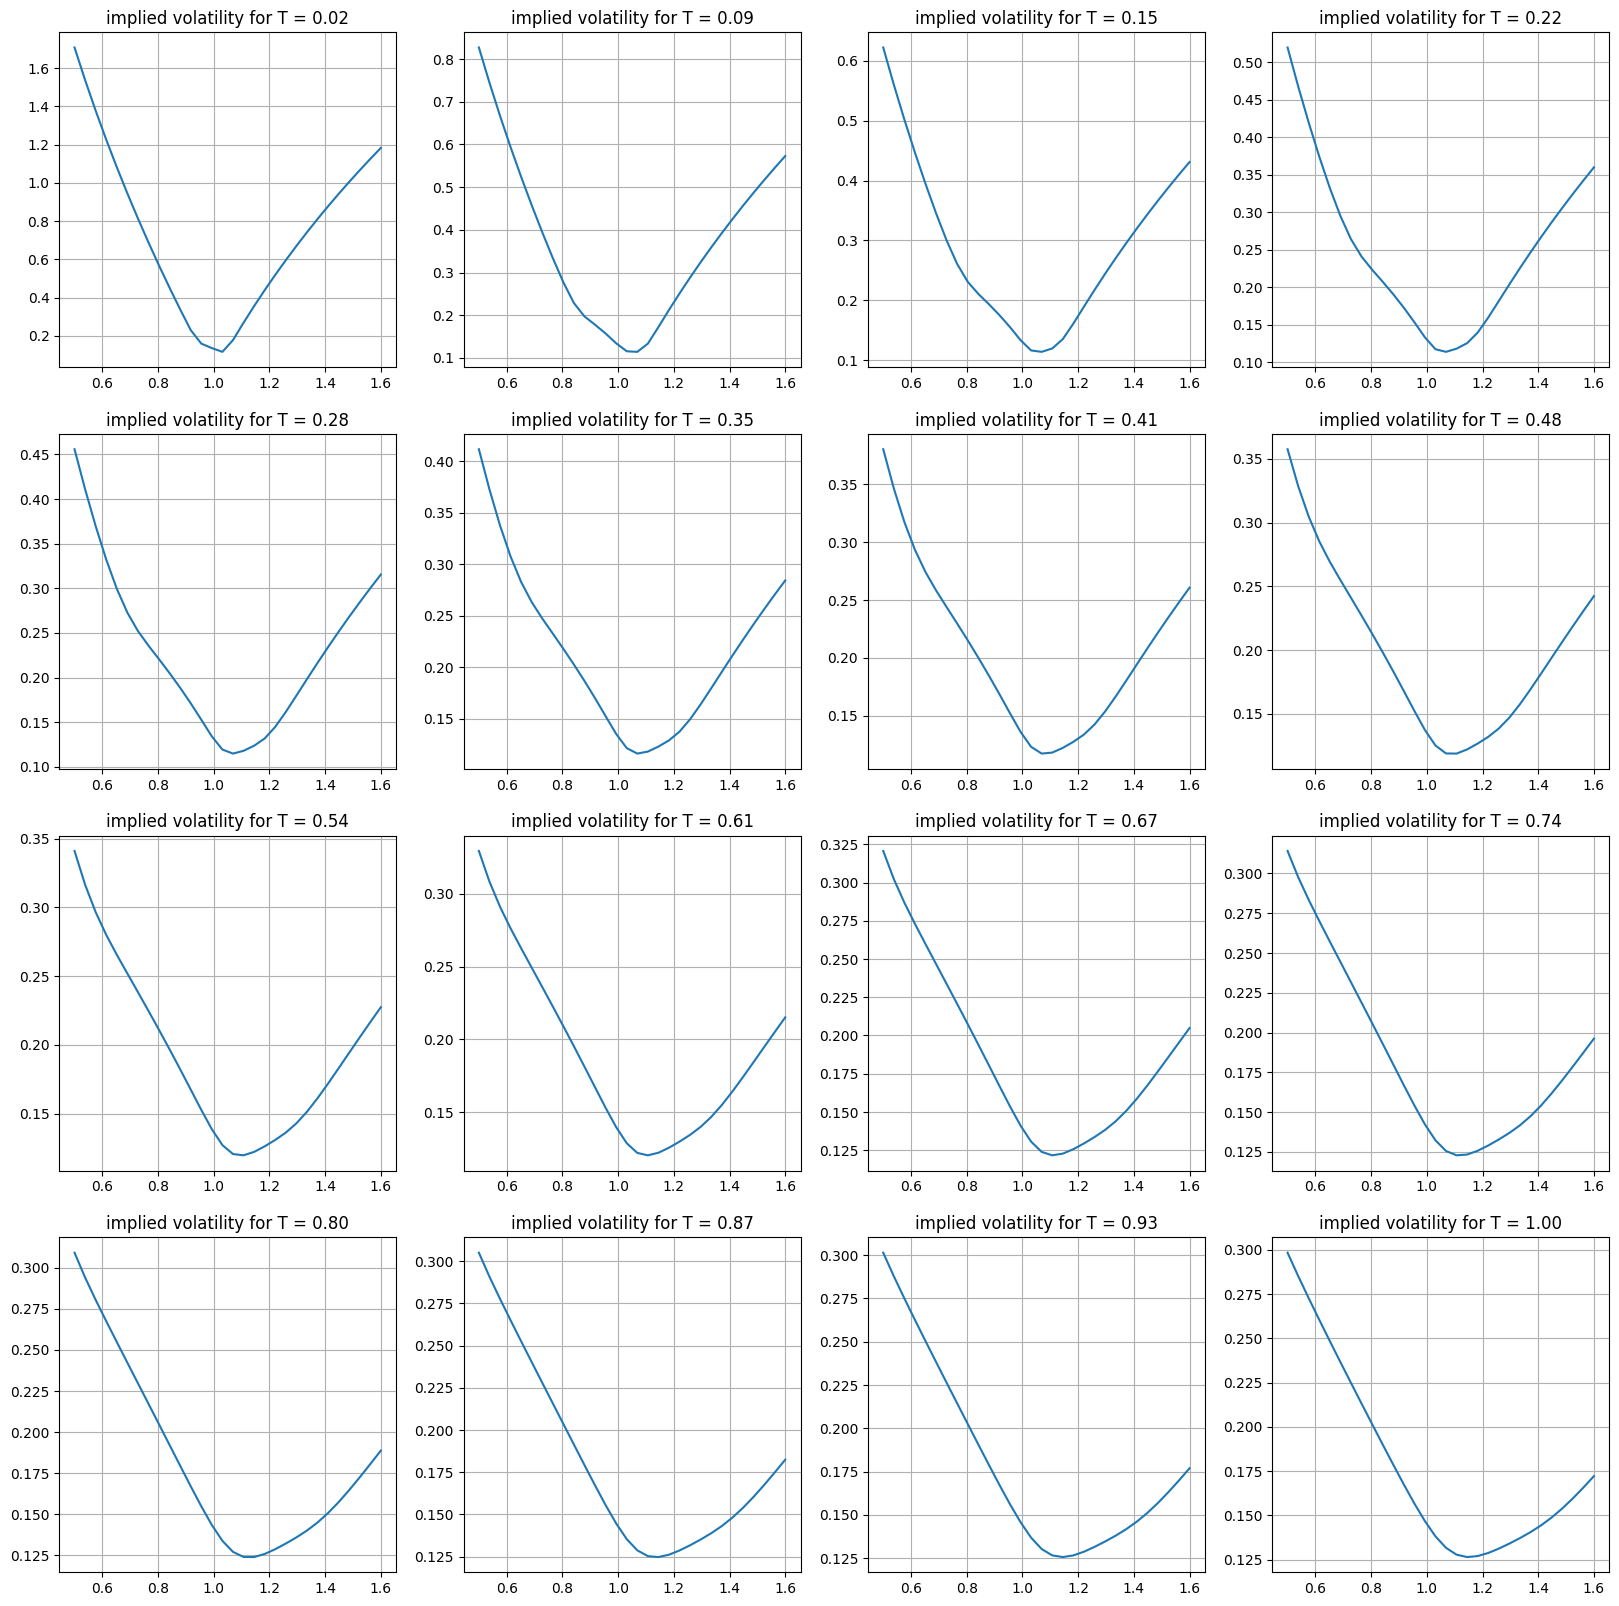

In [6]:
maturities = np.linspace(0.02, 1, 16, endpoint=True)
strikes = np.linspace(0.5, 1.6, 30, endpoint=True)

fig, axs = plt.subplots(nrows=4, ncols=int(len(maturities)/4), figsize=(20,20))
for i, ax in enumerate(axs.flat):
    iv = np.array([ Newton(T=maturities[i], S0=s0, K=K, r=r, q=0, market_price=callprice(K, maturities[i], kappa=kappa, eta=eta), iter=5)  for K in strikes ])
    ax.plot(strikes, iv)
    ax.set_title(f'implied volatility for T = {"{:.2f}".format(maturities[i])}')
    ax.grid()
    #ax.set_xlabel('Strike')
plt.show()

In [16]:
kappas = np.logspace(1,6,6)
#print(kappas)
theta = 0.0398*1.5768
V0 = 0.0175
rho = -0.5711
sigma = 0.5751

r=0.
K = 1.0005 # arnaque!
s0 = 1.

C:\Users\Elie\AppData\Local\Temp\ipykernel_4368\937814812.py:21: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result = integrate.quad(lambda z: (np.exp(1j*z*k) * charfunc(z-1j/2, T, kappa, eta) / (z**2+0.25)).real, 0, np.inf)


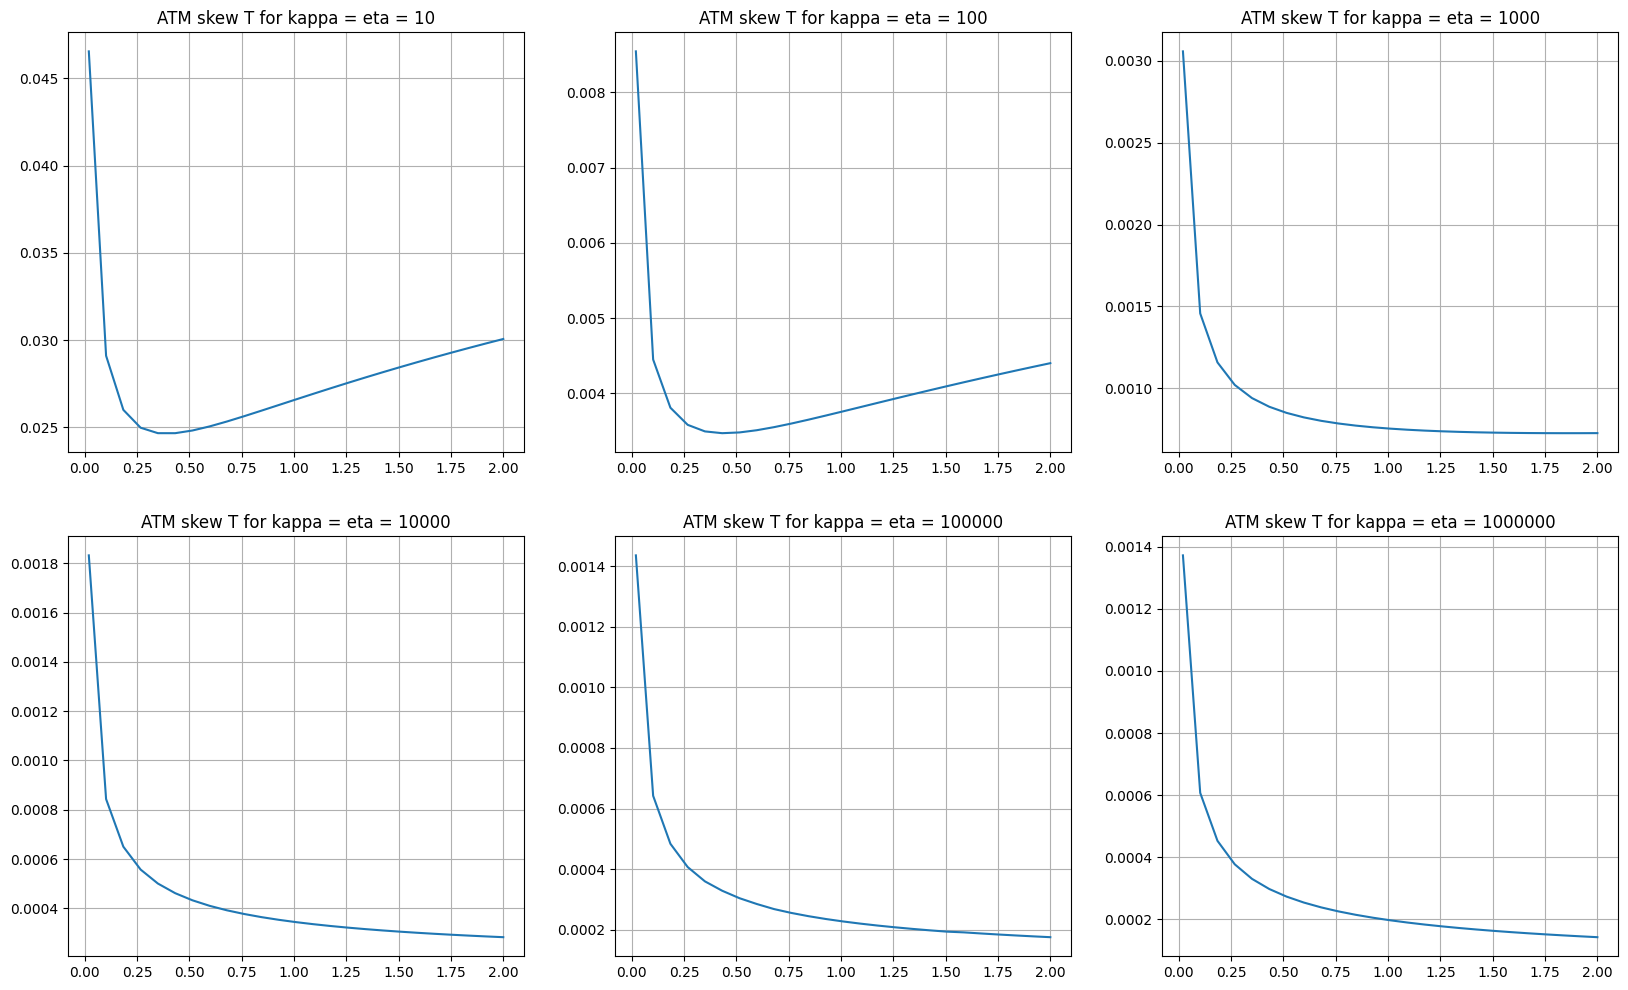

In [17]:
maturities = np.linspace(0.02, 2, 25, endpoint=True)

fig, axs = plt.subplots(nrows=2, ncols=int(len(kappas)/2), figsize=(20,12))
for i, ax in enumerate(axs.flat):
    iv = np.array([ Newton(T=T, S0=s0, K=K, r=r, q=0, market_price=callprice(K, T, kappas[i], kappas[i]), iter=5)  for T in maturities ])
    ax.plot(maturities, iv)
    ax.set_title(f'ATM skew T for kappa = eta = {int(kappas[i])}')
    ax.grid()
    #ax.set_xlabel('Maturity')
plt.show()

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">2. Volterra Heston</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<p  style="background-color: rgb(0, 62, 92); color: white; text-align: center; font-size: 15px;"><strong>  </strong></p>

1. Do the same thing for Volterra Heston model:
Heston by a fractional one:
\begin{align*}
	dS_t &= S_t \sqrt{V_t} dB_t, \quad S_0=1,\\
	V_t &= V_0 + \int_0^t   K_{\epsilon}(t-s) \left(  ( \theta - \lambda V_s) ds +  \eta  \sqrt{V_s} dW_s \right),
\end{align*}
with $K_{\epsilon}(t) = {{(t +\epsilon)}^{H-1/2}}$

by implementing the Adam Scheme (or any other scheme) for the Riccati Volterra equation

2.  Plot the volatility surface for with $T=\{0.02, 0.04, 0.1, 0.25, 0.5, 1. \}$
and parameters 
\begin{equation} \label{eq:roughHestonParams}
 \lambda = 0, \quad    \rho=-0.7, \quad \theta=0.02, \quad \eta=0.3, \quad V_0=0.02, \quad H=0.1.
\end{equation}

3. For fixed $\epsilon =0$, make $H$ vary and plot the atm-skew between 1 week and 1 year for varying $H$ and comment
4. For fixed $H=0.01$ make $\epsilon$ vary and plot the atm-skew between 1 week and 1 year  and comment. 
5. Which model seems more suited for the market? argue. 
 